## Black Friday Dataset EDA and Feature Engineering

Cleaning and preparing the data for model training

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [4]:
#importing the dataset --> Available on Kaggle https://www.kaggle.com/datasets/sdolezel/black-friday?resource=download

df_train = pd.read_csv("train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
df_test = pd.read_csv("test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [19]:
df = df_train.append(df_test)
df1= pd.concat([df_train, df_test])

C:\Users\bkcha\AppData\Local\Temp\ipykernel_29756\1788046562.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


In [15]:
df.shape

(783667, 12)

In [20]:
df1.shape

(783667, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [17]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [18]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

### Removing of unwanted columns
'User_ID' column can be removed as it was not needed for review.

In [21]:
df.drop('User_ID', axis =1, inplace = True)

Note: The 'inplace=True' argument stands for the data frame has to make changes permanent. axis = 0 --> horizontal, axis = 1 --> vertical

In [22]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Dealing with the categorical data --> Gender

In [26]:
#Appropriate method in this scenario:
df['Gender'] = df['Gender'].map({'M':0, 'F':1})

In [27]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [29]:
# the above can also be achieved using get_dummies

pd.get_dummies(df['Gender'], drop_first = True)

,1
0,1
1,1
2,1
3,1
4,0
...,...
233594,1
233595,1
233596,1
233597,1


### Handing the categorical data --> Age

In [31]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [32]:
df['Age'] = df['Age'].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})

In [33]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0


In [34]:
# Also can be dealed using the get_dummies
pd.get_dummies(df['Age'], drop_first= True)

,2,3,4,5,6,7
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
233594,0,1,0,0,0,0
233595,0,1,0,0,0,0
233596,0,1,0,0,0,0
233597,0,0,0,1,0,0


### Handling the categorical data --> City_Category

In [36]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [40]:
df_city = pd.get_dummies(df['City_Category'], drop_first =  True)

In [41]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [42]:
df = pd.concat([df, df_city], axis = 1)

In [43]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [45]:
##drop City Category Feature
df.drop('City_Category', axis = 1, inplace = True)

In [46]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [47]:
## Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### Handle the missing value -- Product_Category_2

In [49]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

Observation: Here the data can be seen as Discrete Quantitative Variable. Eg: Age - {23,24,35}.

In [53]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

Observation: In the above scenario, the mode method need to be considered for filling the null values as the data is distributed within the data values (8.0, 14.0, .....7.0) 

In [56]:
df['Product_Category_2'].mode()[0]

8.0

In [57]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [58]:
df['Product_Category_2'].isnull().sum()

0

In [59]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,8.0,NaN,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,8.0,NaN,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,7,16,4+,0,8,8.0,NaN,7969.0,0,1


In [60]:
## Product_category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [61]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [62]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [63]:
df['Product_Category_3'].isnull().sum()

0

### Handing the categorical data --> Stay_In_Current_City_Years

Here we just need to remove + that was available in the '4+', so we will perform string replace function 

In [66]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', ' ')

C:\Users\bkcha\AppData\Local\Temp\ipykernel_29756\2334442030.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', ' ')


In [67]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,0,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


#Here the datatype of 'Stay_In_Current_City_Years' is object but as per the data it was seen as integer. 

In [71]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [73]:
#Similarly changing the columsn B & C 

df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


### Visualisations

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

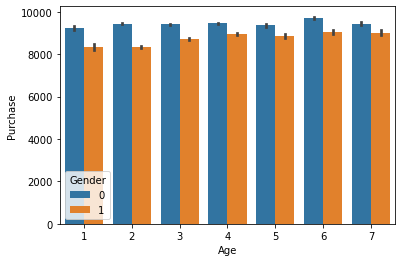

In [75]:
#Compare Age w.r.t Purchase

sns.barplot('Age','Purchase', hue = 'Gender', data = df)

Observation: Purchasing of Men(blue) is higher than Women(orange)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

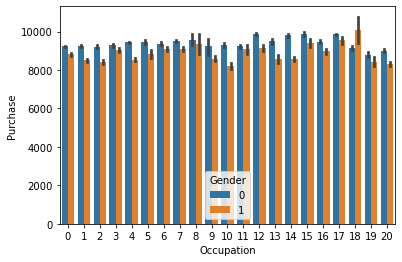

In [76]:
#Purchase wrt Occupation
sns.barplot('Occupation','Purchase', hue = 'Gender', data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

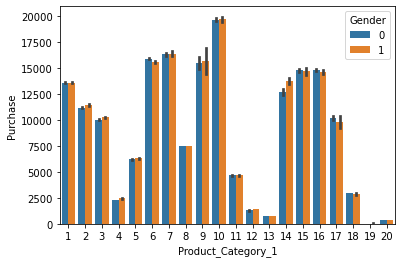

In [77]:
sns.barplot('Product_Category_1','Purchase', hue = 'Gender', data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

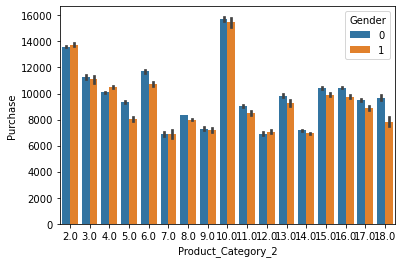

In [78]:
sns.barplot('Product_Category_2','Purchase', hue = 'Gender', data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

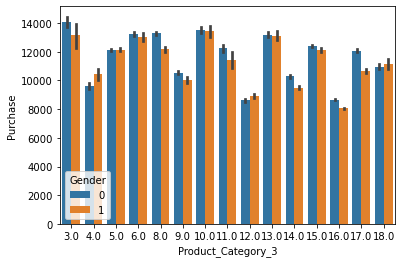

In [79]:
sns.barplot('Product_Category_3','Purchase', hue = 'Gender', data = df)

### Feature Scaling

In [80]:
#splitting of train and test data from the available df

df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]

In [81]:
df_test.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,0,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,0,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,1,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,1,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,1,3,1,1,0,4,5.0,12.0,NaN,0,1


In [82]:
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,0,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [85]:
X = df_train.drop('Purchase', axis =1)

In [86]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,1,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,1,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,0,7,16,4,0,8,8.0,16.0,0,1


In [92]:
y = df_train['Purchase']

In [94]:
#Chnaging the series data to Dataframe
y = y.to_frame()

In [95]:
y.head()

,Purchase
0,8370.0
1,15200.0
2,1422.0
3,1057.0
4,7969.0


In [97]:
#Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [98]:
X_train.drop('Product_ID', axis =1, inplace = True)

In [99]:
X_test.drop('Product_ID', axis =1, inplace = True)

In [101]:
# Standard Scalar

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
## Train the model